To-do：
Silhouette coefficient-kmeans--> to determine the number of clusters


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stt
import matplotlib.pyplot as plt
import warnings
#from mpl_toolkits.basemap import Basemap
warnings.filterwarnings('ignore')
%pylab inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, MeanShift #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from IPython.display import clear_output
clear_output()


In [ ]:
data = pd.read_csv('standardized_data.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,rank,year,Positive affect,Negative affect
0,Afghanistan,NaN,3.724,NaN,NaN,NaN,0.146619,0.230990,0.412946,0.632737,0.486931,0.893460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,2008,0.518,0.258
1,Afghanistan,NaN,4.402,NaN,NaN,NaN,0.180531,0.375897,0.421875,0.579092,0.508228,0.859705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,2009,0.584,0.237
2,Afghanistan,NaN,4.758,NaN,NaN,NaN,0.201875,0.357245,0.430804,0.470426,0.441433,0.708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,2010,0.618,0.275
3,Afghanistan,NaN,3.832,NaN,NaN,NaN,0.196489,0.331420,0.437946,0.327373,0.481123,0.734177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,2011,0.611,0.267
4,Afghanistan,NaN,3.783,NaN,NaN,NaN,0.213445,0.331420,0.445089,0.375516,0.552759,0.781646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136,2012,0.710,0.268


In [ ]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'rank', 'year', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [ ]:
#categorize the data 
data_l = data[data['Ladder score'] < 4]
data_h = data[data['Ladder score'] > 6] #682row*24col  --> 592 rows after dropna()

the clusters are: 
 [[0.85715585 0.92488162 0.89198661 0.89955171 0.4624089  0.31105026]
 [0.67710007 0.85780224 0.81060165 0.73049844 0.25555676 0.79681948]
 [0.76755593 0.9068187  0.83869737 0.8402085  0.52595914 0.69643571]]


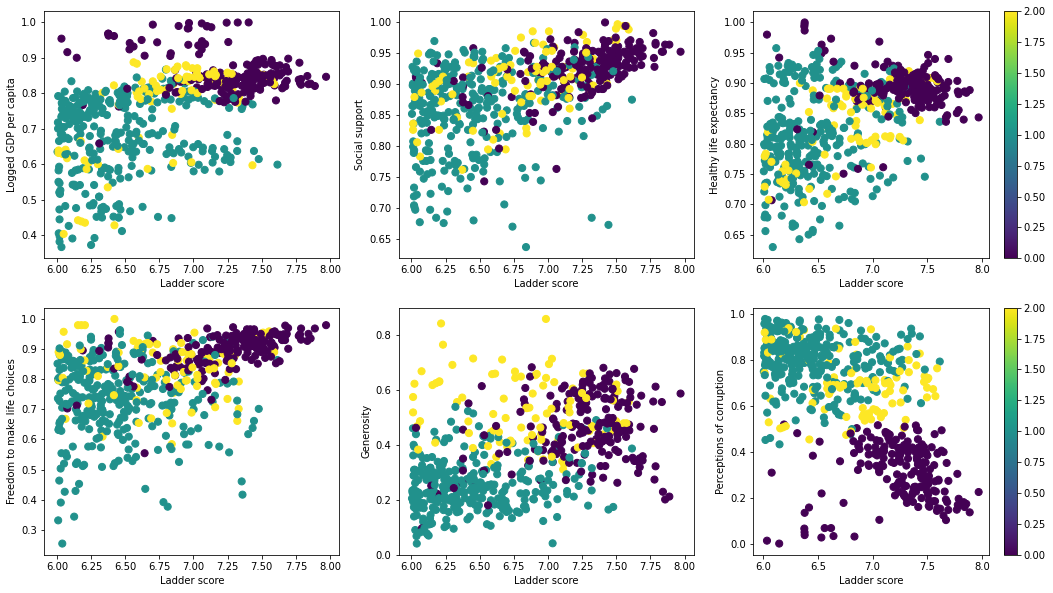

In [ ]:
myKMeans(data_h,3)


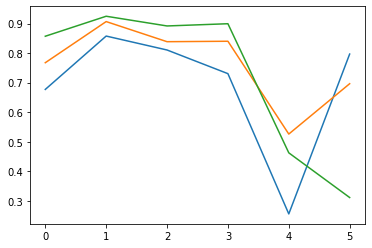

In [ ]:
 x = range(6)
centers  = np.array([[0.85715585, 0.92488162, 0.89198661, 0.89955171, 0.4624089,  0.31105026],
 [0.67710007, 0.85780224, 0.81060165, 0.73049844, 0.25555676, 0.79681948],
 [0.76755593, 0.9068187,  0.83869737, 0.8402085,  0.52595914, 0.69643571]])

plt.plot(x,centers[1,:],x,centers[2,:],x,centers[0,:])

the clusters are: 
 [[0.5724616  0.69261119 0.61567057 0.53501834 0.16214908 0.82529008]
 [0.18471973 0.41623766 0.46732799 0.71008981 0.38012262 0.78387937]
 [0.21839039 0.65016382 0.44360441 0.51926749 0.28952045 0.83013729]
 [0.16447539 0.30181296 0.41319873 0.28198074 0.43113614 0.82188978]
 [0.18578363 0.48493544 0.61354167 0.8754394  0.34796171 0.10876699]]


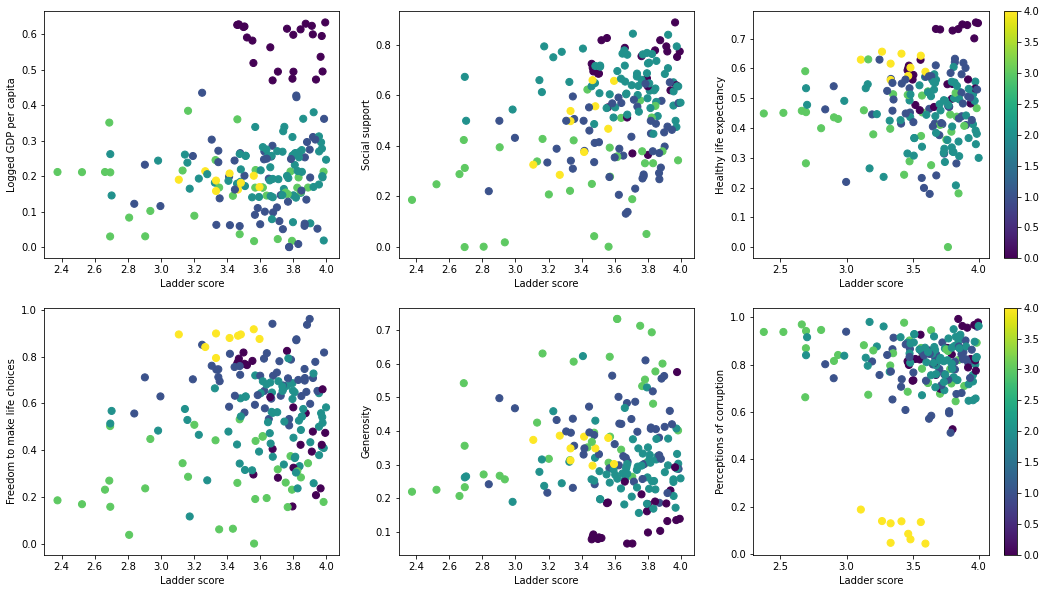

In [ ]:
myKMeans(data_l,5)


In [ ]:
x = range(6)
centers  = np.array( [[0.5724616,  0.69261119, 0.61567057, 0.53501834, 0.16214908, 0.82529008],
 [0.18471973, 0.41623766, 0.46732799, 0.71008981, 0.38012262, 0.78387937],
 [0.21839039, 0.65016382, 0.44360441, 0.51926749, 0.28952045, 0.83013729],
 [0.16447539, 0.30181296, 0.41319873, 0.28198074, 0.43113614, 0.82188978],
 [0.18578363, 0.48493544, 0.61354167, 0.8754394,  0.34796171, 0.10876699]] )

print(centers.shape)

(5, 6)


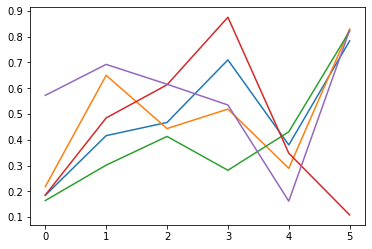

In [ ]:
plt.plot(x,centers[1,:],x,centers[2,:],x,centers[3,:],x,centers[4,:],x,centers[0,:])

In [ ]:
#data_h.columns
col = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
          'Perceptions of corruption']
data_new = data_h[col].dropna()
data_new.head

<bound method NDFrame.head of       Logged GDP per capita  ...  Perceptions of corruption
40                 0.659685  ...                   0.861814
41                 0.674845  ...                   0.892405
43                 0.666667  ...                   0.896624
44                 0.684421  ...                   0.864979
45                 0.693597  ...                   0.759494
...                     ...  ...                        ...
2027               0.614802  ...                   0.758439
2028               0.635747  ...                   0.777426
2029               0.636545  ...                   0.746835
2030               0.619190  ...                   0.845992
2031               0.582885  ...                   0.835443

[592 rows x 6 columns]>

In [ ]:
def myKMeans(data,num_cluster):  

  col0 = ['Country name','Ladder score']
  col = ['Country name','Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
          'Perceptions of corruption']
  temp = data[col].dropna()
  ref = temp[col0]
  data_new = temp.drop( col0, axis=1)
  #min_max_scaler = MinMaxScaler()
  #data_new[col] = min_max_scaler.fit_transform(data_new)        

  #num_cluster = 3        
  model = KMeans(num_cluster)
  model.fit(data_new)        
  labels = model.predict(data_new)
  print('the clusters are: \n', model.cluster_centers_)


  #plotting
  fig = plt.figure(figsize=(18,10))
  ax = fig.add_subplot(231)
  scatter = ax.scatter(ref['Ladder score'],data_new['Logged GDP per capita'],c=labels,s=50)
  #ax.set_title('K-Means Clustering')
  ax.set_xlabel('Ladder score')
  ax.set_ylabel('Logged GDP per capita')
  #plt.colorbar(scatter)

  ax = fig.add_subplot(232)
  scatter = ax.scatter(ref['Ladder score'],data_new['Social support'],c=labels,s=50)
  #ax.set_title('K-Means Clustering')
  ax.set_xlabel('Ladder score')
  ax.set_ylabel('Social support')
  #plt.colorbar(scatter)

  ax = fig.add_subplot(233)
  scatter = ax.scatter(ref['Ladder score'],data_new['Healthy life expectancy'],c=labels,s=50)
  #ax.set_title('K-Means Clustering')
  ax.set_xlabel('Ladder score')
  ax.set_ylabel('Healthy life expectancy')
  plt.colorbar(scatter)

  ax = fig.add_subplot(234)
  scatter = ax.scatter(ref['Ladder score'],data_new['Freedom to make life choices'],c=labels,s=50)
  #ax.set_title('K-Means Clustering')
  ax.set_xlabel('Ladder score')
  ax.set_ylabel('Freedom to make life choices')
  #plt.colorbar(scatter)

  ax = fig.add_subplot(235)
  scatter = ax.scatter(ref['Ladder score'],data_new['Generosity'],c=labels,s=50)
  #ax.set_title('K-Means Clustering')
  ax.set_xlabel('Ladder score')
  ax.set_ylabel('Generosity')
  #plt.colorbar(scatter)

  ax = fig.add_subplot(236)
  scatter = ax.scatter(ref['Ladder score'],data_new['Perceptions of corruption'],c=labels,s=50)
  #ax.set_title('K-Means Clustering')
  ax.set_xlabel('Ladder score')
  ax.set_ylabel('Perceptions of corruption')
  plt.colorbar(scatter)


In [ ]:
data_l.columns

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
data_l_cn = data_l['Country name'].to_numpy()
data_l_names, data_l_labels = np.unique(data_l_cn, return_inverse=True)
print('the number of lower happiness country is ', len(data_l_names), '\n', data_l_names,'\n*****\n')
data_h_cn = data_h['Country name'].to_numpy()
data_h_names, data_h_labels = np.unique(data_h_cn, return_inverse=True)
print('the number of higher happiness country is ', len(data_h_names), '\n', data_h_names)


the number of lower happiness country is  45 
 ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad'
 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Egypt' 'Gabon'
 'Georgia' 'Ghana' 'Guinea' 'Haiti' 'India' 'Ivory Coast' 'Kenya'
 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Nepal'
 'Niger' 'Rwanda' 'Senegal' 'Sierra Leone' 'South Africa' 'South Sudan'
 'Sri Lanka' 'Syria' 'Tanzania' 'Togo' 'Uganda' 'Ukraine' 'Yemen' 'Zambia'
 'Zimbabwe'] 
*****

the number of higher happiness country is  81 
 ['Algeria' 'Argentina' 'Australia' 'Austria' 'Bahrain' 'Belgium' 'Belize'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Guatemala' 'Honduras' 'Hungary' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jord

There should be some overlaps within the three stages

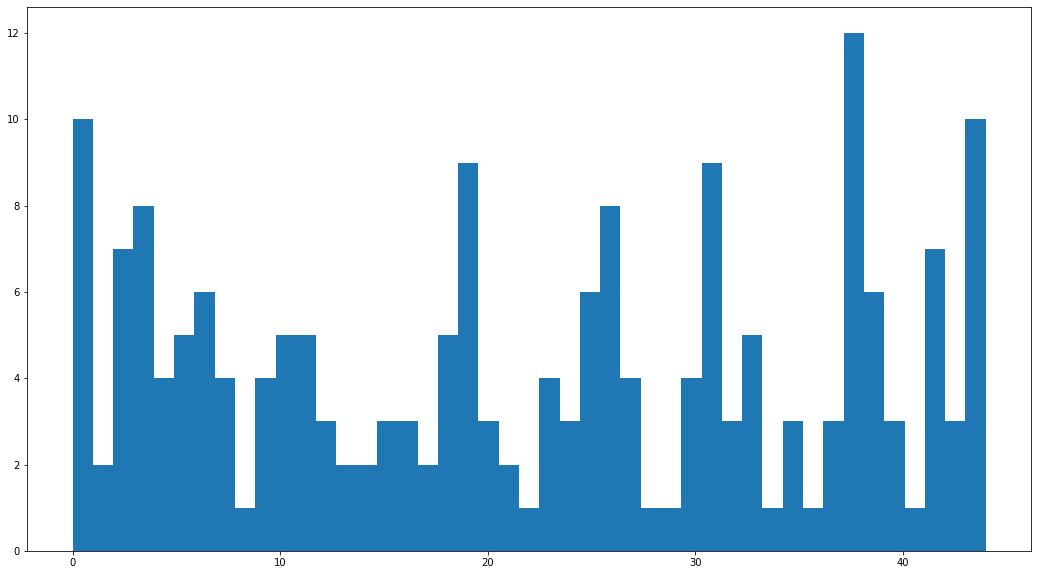

In [ ]:
plt.figure(figsize=(18,10))
plt.hist(data_l_labels,bins=45)
plt.show()

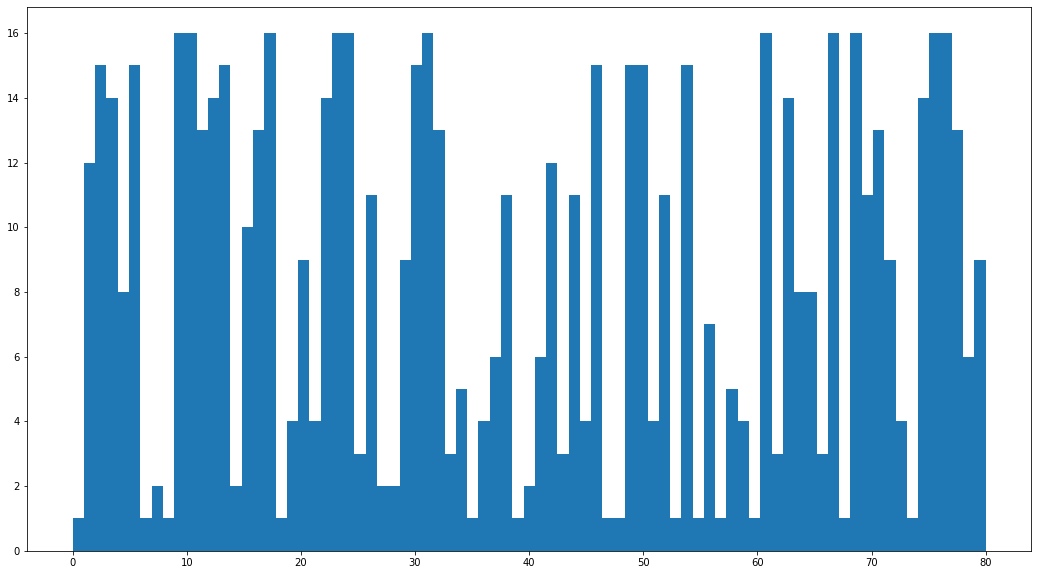

In [ ]:
plt.figure(figsize=(18,10))
plt.hist(data_h_labels,bins=81)
plt.show()

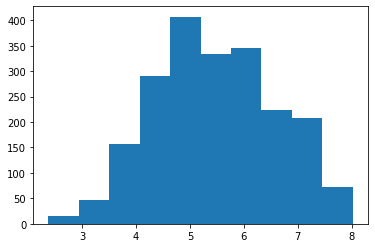

In [ ]:
#check
import matplotlib.pyplot as plt

plt.hist(data['Ladder score'])
plt.show()

the clusters are: 
 [[0.25984612 0.56672933 0.49565467 0.5884599  0.3557449  0.78413538]
 [0.61375156 0.80031951 0.75520598 0.65104404 0.26451517 0.83655667]
 [0.82854171 0.92236895 0.87541105 0.88198636 0.45149192 0.41357028]]


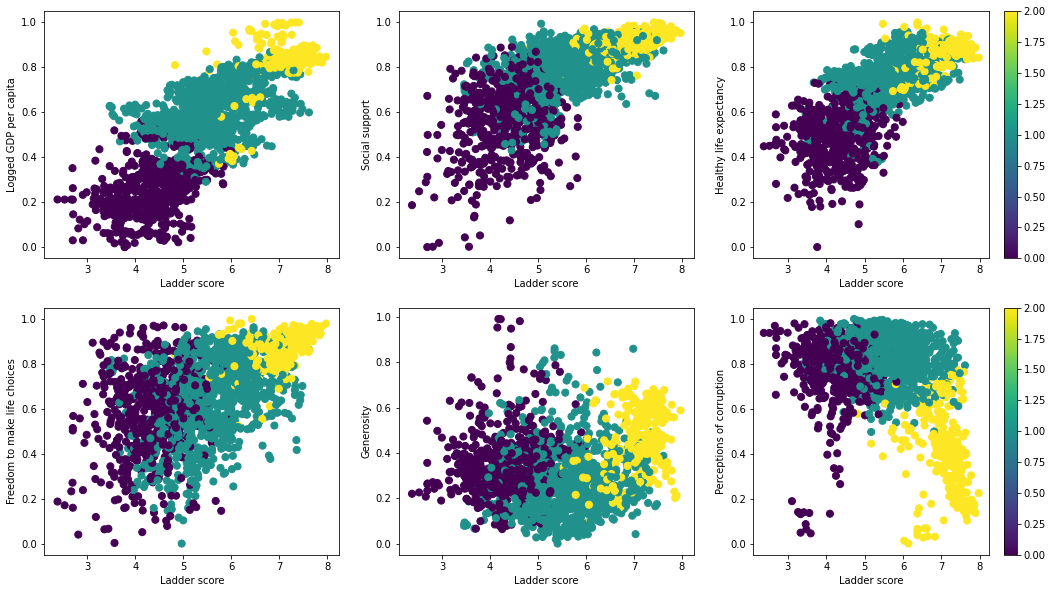

In [ ]:
myKMeans(data,3)

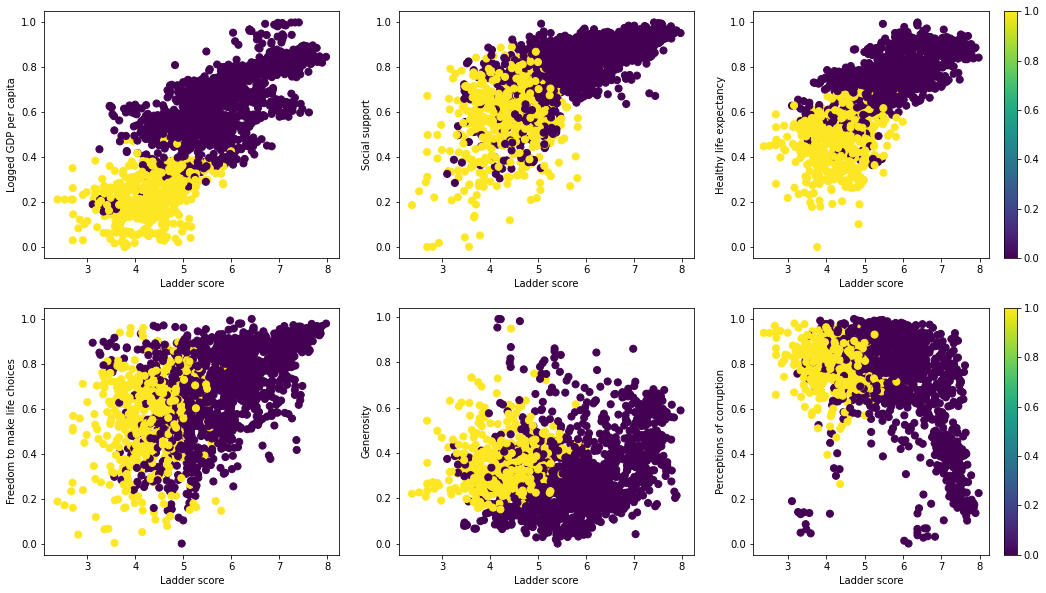

In [ ]:
#AgglomerativeClustering
col0 = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
col = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']        
data_new = data[col0].dropna()
#min_max_scaler = MinMaxScaler()
#data_new[col] = min_max_scaler.fit_transform(data_new)        

      
model =  AgglomerativeClustering().fit(data_new[col])        
labels = model.labels_

#plotting
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(231)
scatter = ax.scatter(data_new['Ladder score'],data_new['Logged GDP per capita'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Logged GDP per capita')
#plt.colorbar(scatter)

ax = fig.add_subplot(232)
scatter = ax.scatter(data_new['Ladder score'],data_new['Social support'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Social support')
#plt.colorbar(scatter)

ax = fig.add_subplot(233)
scatter = ax.scatter(data_new['Ladder score'],data_new['Healthy life expectancy'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Healthy life expectancy')
plt.colorbar(scatter)

ax = fig.add_subplot(234)
scatter = ax.scatter(data_new['Ladder score'],data_new['Freedom to make life choices'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Freedom to make life choices')
#plt.colorbar(scatter)

ax = fig.add_subplot(235)
scatter = ax.scatter(data_new['Ladder score'],data_new['Generosity'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Generosity')
#plt.colorbar(scatter)

ax = fig.add_subplot(236)
scatter = ax.scatter(data_new['Ladder score'],data_new['Perceptions of corruption'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Perceptions of corruption')
plt.colorbar(scatter)

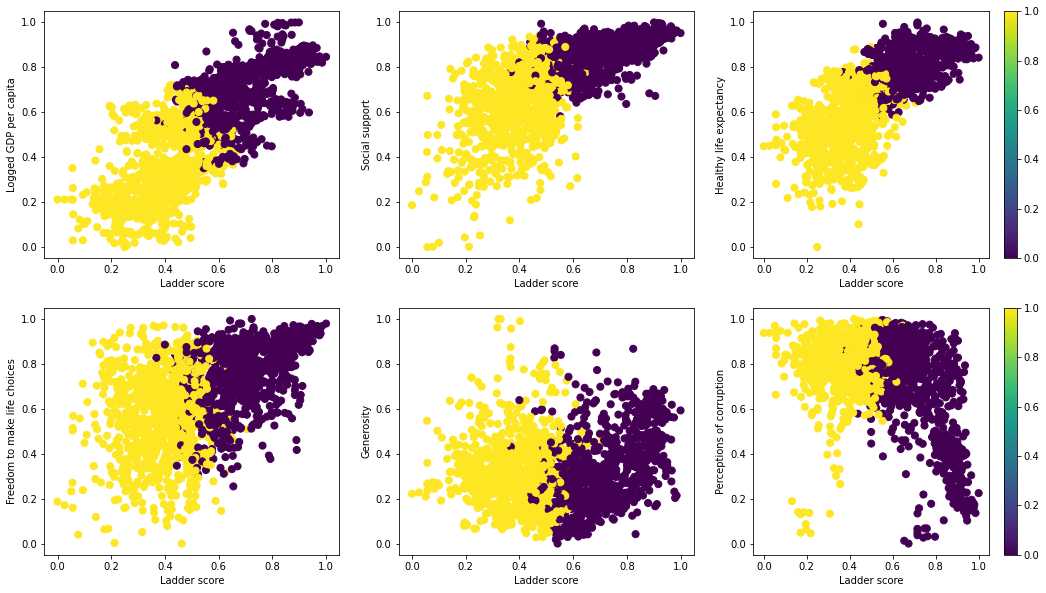

In [ ]:
myKMeans(data,2)

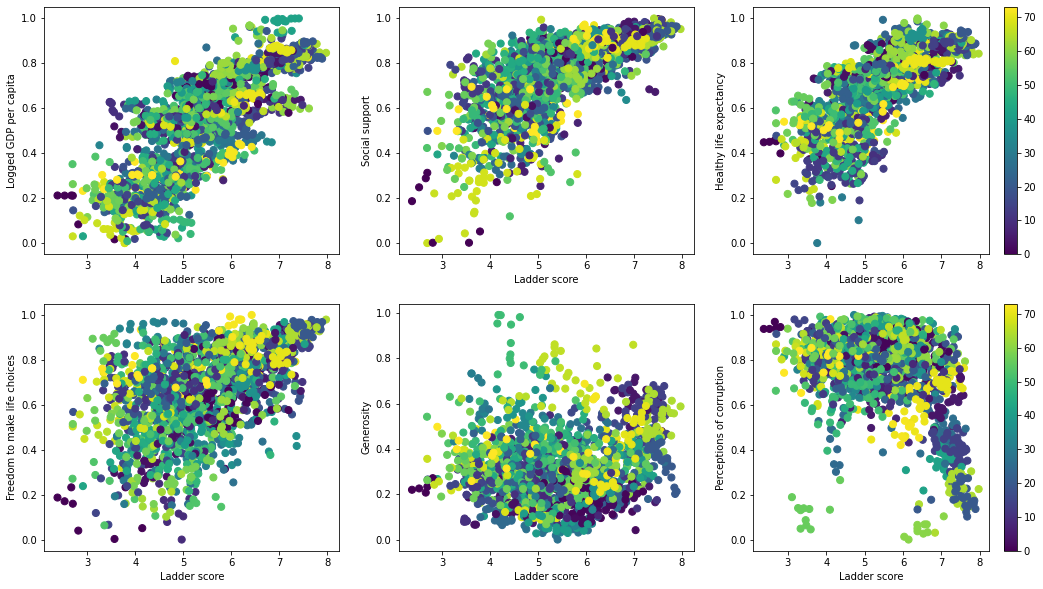

In [ ]:
#AffinityPropagation （better for high dim data or multi_classes data）

col0 = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
col = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
data_new = data[col0].dropna()
#min_max_scaler = MinMaxScaler()
#data_new[col] = min_max_scaler.fit_transform(data_new)        

      
model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
model.fit(data_new[col])        
labels = model.predict(data_new[col])

#plotting
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(231)
scatter = ax.scatter(data_new['Ladder score'],data_new['Logged GDP per capita'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Logged GDP per capita')
#plt.colorbar(scatter)

ax = fig.add_subplot(232)
scatter = ax.scatter(data_new['Ladder score'],data_new['Social support'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Social support')
#plt.colorbar(scatter)

ax = fig.add_subplot(233)
scatter = ax.scatter(data_new['Ladder score'],data_new['Healthy life expectancy'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Healthy life expectancy')
plt.colorbar(scatter)

ax = fig.add_subplot(234)
scatter = ax.scatter(data_new['Ladder score'],data_new['Freedom to make life choices'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Freedom to make life choices')
#plt.colorbar(scatter)

ax = fig.add_subplot(235)
scatter = ax.scatter(data_new['Ladder score'],data_new['Generosity'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Generosity')
#plt.colorbar(scatter)

ax = fig.add_subplot(236)
scatter = ax.scatter(data_new['Ladder score'],data_new['Perceptions of corruption'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Perceptions of corruption')
plt.colorbar(scatter)

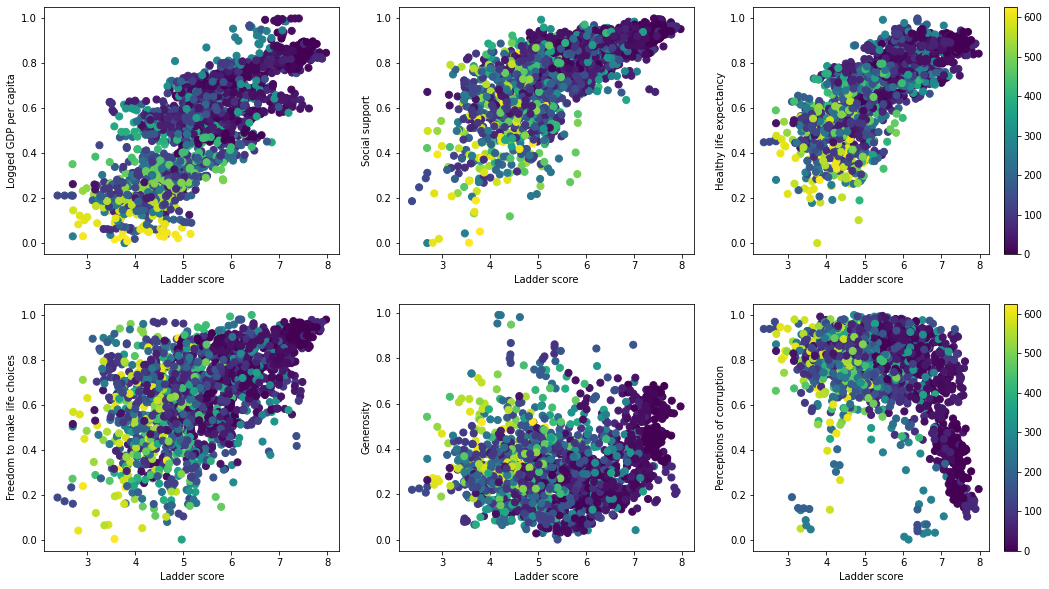

In [ ]:
#meanshift
col0 = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
col = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
        'Perceptions of corruption']
data_new = data[col0].dropna()
#min_max_scaler = MinMaxScaler()
#data_new[col] = min_max_scaler.fit_transform(data_new)        

      
model = MeanShift(bandwidth=0.1)
model.fit(data_new[col])        
labels = model.labels_

#plotting
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(231)
scatter = ax.scatter(data_new['Ladder score'],data_new['Logged GDP per capita'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Logged GDP per capita')
#plt.colorbar(scatter)

ax = fig.add_subplot(232)
scatter = ax.scatter(data_new['Ladder score'],data_new['Social support'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Social support')
#plt.colorbar(scatter)

ax = fig.add_subplot(233)
scatter = ax.scatter(data_new['Ladder score'],data_new['Healthy life expectancy'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Healthy life expectancy')
plt.colorbar(scatter)

ax = fig.add_subplot(234)
scatter = ax.scatter(data_new['Ladder score'],data_new['Freedom to make life choices'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Freedom to make life choices')
#plt.colorbar(scatter)

ax = fig.add_subplot(235)
scatter = ax.scatter(data_new['Ladder score'],data_new['Generosity'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Generosity')
#plt.colorbar(scatter)

ax = fig.add_subplot(236)
scatter = ax.scatter(data_new['Ladder score'],data_new['Perceptions of corruption'],c=labels,s=50)
#ax.set_title('K-Means Clustering')
ax.set_xlabel('Ladder score')
ax.set_ylabel('Perceptions of corruption')
plt.colorbar(scatter)